# Projekt ZUM. Streszczenie tekstu. Wstępna analiza datasetu.

In [4]:
!pip install datasets

In [5]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
# wyświetlanie przykładowej pary tekst - streszczenie
ds["train"][0]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [7]:
# średnia długość tekstu i średnia długość streszczeń
import numpy as np
from collections import Counter

def get_len(x):
    return len(x.split())

text_len = [get_len(x) for x in ds["train"]["article"]]
summary_len = [get_len(x) for x in ds["train"]["highlights"]]

print(f"średnia długość tekstu: {np.mean(text_len)}")
print(f"średnia długość streszczeń: {np.mean(summary_len)}")

średnia długość tekstu: 691.8703263175126
średnia długość streszczeń: 51.574101486174435


In [8]:
ratios = [s_len / t_len for s_len, t_len in zip(summary_len, text_len)]
print(f"Średnia proporcja długości streszczeń do tekstów: {np.mean(ratios):.2f}")


Średnia proporcja długości streszczeń do tekstów: 0.09


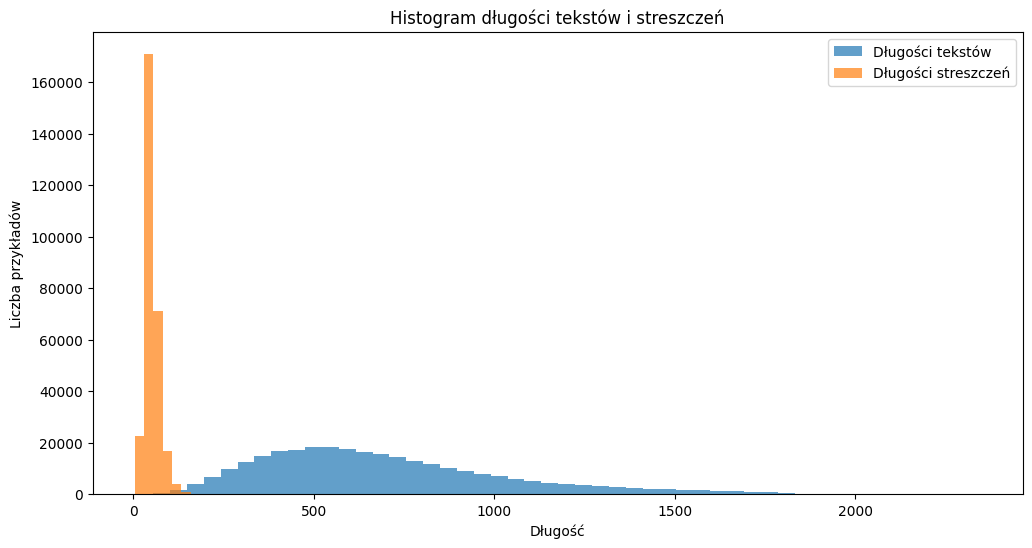

In [9]:
import matplotlib.pyplot as plt

# Histogramy
plt.figure(figsize=(12, 6))
plt.hist(text_len, bins=50, alpha=0.7, label="Długości tekstów")
plt.hist(summary_len, bins=50, alpha=0.7, label="Długości streszczeń")
plt.legend()
plt.title("Histogram długości tekstów i streszczeń")
plt.xlabel("Długość")
plt.ylabel("Liczba przykładów")
plt.show()


In [14]:
def count_words(text):
    return len(text.split())

# Najdłuższy i najkrótszy artykuł
longest_article = max(ds["train"]["article"], key=lambda x: count_words(x))
shortest_article = min(ds["train"]["article"], key=lambda x: count_words(x))

print(f"Najdłuższy artykuł (liczba słów: {count_words(longest_article)}):\n{longest_article[:500]}...\n")
print(f"Najkrótszy artykuł (liczba słów: {count_words(shortest_article)}):\n{shortest_article[:500]}\n")

# Najdłuższe i najkrótsze streszczenie
longest_summary = max(ds["train"]["highlights"], key=lambda x: count_words(x))
shortest_summary = min(ds["train"]["highlights"], key=lambda x: count_words(x))

print(f"Najdłuższe streszczenie (liczba słów: {count_words(longest_summary)}):\n{longest_summary[:500]}...\n")
print(f"Najkrótsze streszczenie (liczba słów: {count_words(shortest_summary)}):\n{shortest_summary[:500]}\n")

Najdłuższy artykuł (liczba słów: 2347):
Taylor Swift has won hundreds of awards, but she'll likely never forget her 2009 Best Female Video at the MTV Video Music Awards. Rapper Kanye West rushed the stage, stealing the microphone from the unsuspecting singer and insisting fellow nominee Beyonce had 'one of the best videos of all time.' However, six years later the two seemed chummy as they posed backstage at the 57th Grammy Awards in Los Angeles. Scroll down for video . Reconciled: It looks like all is good between Kanye West (L) and ...

Najkrótszy artykuł (liczba słów: 8):
Downton Abbey's famously grim butler, Mr Bates .

Najdłuższe streszczenie (liczba słów: 1296):
The Great British Bake Off final expects to draw an audience of over 4 million tonight .
27% of Britons say they will bake more in the next year .
National Baking Week runs 15th -21st October .
Baking is most popular in Yorkshire .
1 in 7 adults bake at least twice a week .
Servants leave for the First World War and work 